In [4]:
import requests
import xarray as xr
import numpy as np
import cmocean as cmo

In [ ]:
url = "https://ns9081k.hyrax.sigma2.no/opendap/S800/norseas_800m_avg.nc4_2005010112"
local_filename = "norseas_800m_avg_2005010112.nc"

# Stream download
with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

# Now open it with xarray
print(f"Downloaded {local_filename} from {url}")
ds = xr.open_dataset(local_filename)
print(ds)

Downloaded norseas_800m_avg_2005010112.nc from https://ns9081k.hyrax.sigma2.no/opendap/S800/norseas_800m_avg.nc4_2005010112
<xarray.Dataset> Size: 2GB
Dimensions:      (ocean_time: 1, s_rho: 35, s_w: 36, eta_rho: 1151,
                  xi_rho: 1301, eta_u: 1151, xi_u: 1300, eta_v: 1150, xi_v: 1301)
Coordinates:
  * ocean_time   (ocean_time) datetime64[ns] 8B 2005-01-01T12:00:00
  * s_rho        (s_rho) float64 280B -0.9857 -0.9571 ... -0.04286 -0.01429
  * s_w          (s_w) float64 288B -1.0 -0.9714 -0.9429 ... -0.02857 0.0
    lon_rho      (eta_rho, xi_rho) float64 12MB ...
    lat_rho      (eta_rho, xi_rho) float64 12MB ...
    lon_u        (eta_u, xi_u) float64 12MB ...
    lat_u        (eta_u, xi_u) float64 12MB ...
    lon_v        (eta_v, xi_v) float64 12MB ...
    lat_v        (eta_v, xi_v) float64 12MB ...
Dimensions without coordinates: eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v
Data variables: (12/24)
    Vtransform   int32 4B ...
    Vstretching  int32 4B ...
    theta_s   

In [2]:
ds

<xarray.Dataset> Size: 2GB
Dimensions:      (ocean_time: 1, s_rho: 35, s_w: 36, eta_rho: 1151,
                  xi_rho: 1301, eta_u: 1151, xi_u: 1300, eta_v: 1150, xi_v: 1301)
Coordinates:
  * ocean_time   (ocean_time) datetime64[ns] 8B 2005-01-01T12:00:00
  * s_rho        (s_rho) float64 280B -0.9857 -0.9571 ... -0.04286 -0.01429
  * s_w          (s_w) float64 288B -1.0 -0.9714 -0.9429 ... -0.02857 0.0
    lon_rho      (eta_rho, xi_rho) float64 12MB ...
    lat_rho      (eta_rho, xi_rho) float64 12MB ...
    lon_u        (eta_u, xi_u) float64 12MB ...
    lat_u        (eta_u, xi_u) float64 12MB ...
    lon_v        (eta_v, xi_v) float64 12MB ...
    lat_v        (eta_v, xi_v) float64 12MB ...
Dimensions without coordinates: eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v
Data variables: (12/24)
    Vtransform   int32 4B ...
    Vstretching  int32 4B ...
    theta_s      float64 8B ...
    theta_b      float64 8B ...
    Tcline       float64 8B ...
    hc           float64 8B ...
    ...           ...
    ubar         (ocean_time, eta_u, xi_u) float64 12MB ...
    vbar         (ocean_time, eta_v, xi_v) float64 12MB ...
    u            (ocean_time, s_rho, eta_u, xi_u) float64 419MB ...
    v            (ocean_time, s_rho, eta_v, xi_v) float64 419MB ...
    temp         (ocean_time, s_rho, eta_rho, xi_rho) float64 419MB ...
    salt         (ocean_time, s_rho, eta_rho, xi_rho) float64 419MB ...
Attributes:
    history:      Created by roms2nc4single.py from ROMS output file
    institution:  Institute of Marine Research
    type:         ROMS/TOMS nonlinear model averages file
    title:        ROMS 3.5 - NorSeas-800m
    svn_url:      https://www.myroms.org/svn/omlab/branches/kate
    code_dir:     /work/users/jonal/NorROMS/ROMS_src/official/ROMS_kate
    CPP_options:  NORSEAS800M, ADD_FSOBC, ADD_M2OBC, ALBEDO, ATM_PRESS, ANA_B...

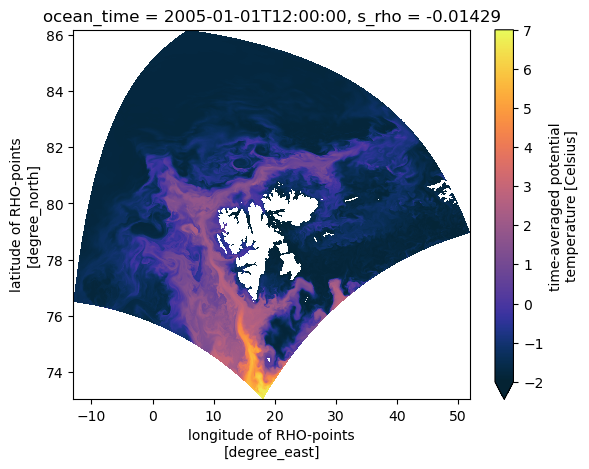

In [5]:
ds.isel(ocean_time=0, s_rho=-1).temp.plot(x="lon_rho", y="lat_rho", cmap=cmo.cm.thermal, vmin=-2, vmax=7)